<a href="https://colab.research.google.com/github/ilyesrezgui/ML-Notebooks/blob/master/images_classification_resnet_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check whether you're connected to internet or not, because we're gonna collection our data usong the internet and specificlly from google images
* Insure You're connected to the net

In [1]:
import socket,warnings
try:
    #set the default timeout for socket operations to 1 second. If a socket operation takes more than 1s to complete, it will be considered unsuccessful.
    socket.setdefaulttimeout(1)
    #created a socket object, where socket.AF_INET specifies you're using IPv4 family of adresses and socket.SOCK_STREAM specifies that is is a TCP type of connection
    socket.socket(socket.AF_INET,socket.SOCK_STREAM).connect(('1.1.1.1', 53)) #then they try yo connect on the 1.1.1.1 IP adress on the port 53
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")


In [3]:
!pip install duckduckgo_search



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.7 MB/s eta 0:00:00


* Collect your images from the internet based on a specific keyword

In [13]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    #return L(ddg_images(term, max_results=max_images))
    return L(ddg_images(term, max_results=max_images)).itemgot('image')
    #return L(ddg_images(term, max_results=max_images)).itemgot('url')



#specify the term you want to look for on the internet , in this example we're using bird, and how many pivtures you want us to retrun
urls = search_images('moon photos', max_images=2)
urls[0]
print(urls)

Searching for 'moon photos'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


['https://external-preview.redd.it/m6dY2kj-qblZnrdOgJuVVIaiSeMUzx0ythgft1uExUk.jpg?auto=webp&s=46ee9e4b6282d5948c47de54033eaccda9c0edac', 'http://planetary.s3.amazonaws.com/image/20110319_vollmond.jpg']


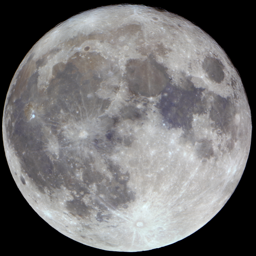

In [14]:
#first let's try visualizing our image urls[0], we download it from the link in urls[0] with the name bird.jpg that we saved in a variable dest
from fastdownload import download_url
dest = 'moon.jpg'
download_url(urls[1],dest, show_progress=True)
#then we visualize our image in a 256x256 format
from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'sun photos'


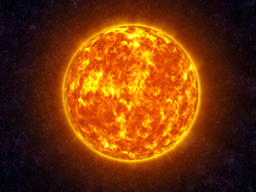

In [15]:
download_url(search_images('sun photos', max_images=1)[0], 'sun.jpg', show_progress=False)
Image.open('sun.jpg').to_thumb(256,256)

In [17]:
#we first create the keywords of the images we want to search the net for
searches = 'sun','moon','earth'
# we defined the path to where we're gonna save all of our images, this path will have two subdirectories where one will have birds and the other forests
path = Path('sun_moon_earth')

from time import sleep
#loop over the keywords
for o in searches:
    #create the path to in the format of  bird_or_not/forest and then bird_or_not/bird
    dest = (path/o)
    #create the directory with that path if it is not existant
    dest.mkdir(exist_ok=True, parents=True)
    #search for images on the net and then download them in the specific directory
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server

    #download more images by changing the prompt
    download_images(dest, urls=search_images(f'{o} day photo'))
    #sleep 10 seconds to avoid overloading the server with requests
    sleep(10)
    #download more images by changing the prompt , it is worth noting that we built the search images function and has 30 images as a random maximum number
    download_images(dest, urls=search_images(f'{o} night photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'sun photo'
Searching for 'sun day photo'
Searching for 'sun night photo'
Searching for 'moon photo'
Searching for 'moon day photo'
Searching for 'moon night photo'
Searching for 'earth photo'
Searching for 'earth day photo'
Searching for 'earth night photo'


In [18]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

12

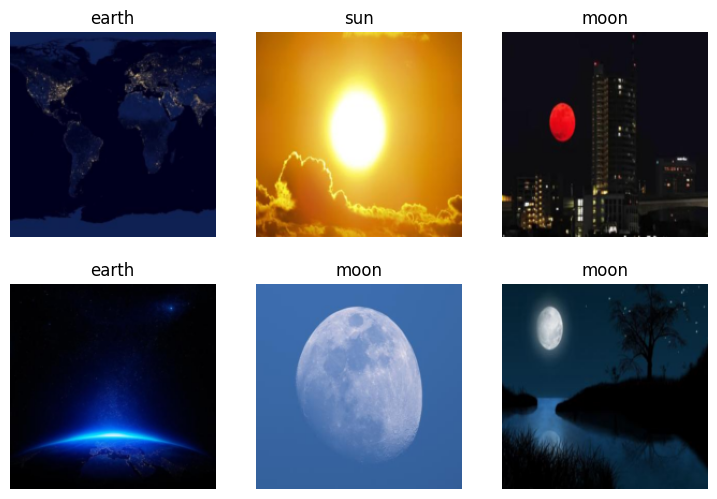

In [19]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [20]:

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 296MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.503070,0.888080,0.291667,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.635387,0.526309,0.104167,00:02
1,0.370299,0.629079,0.145833,00:01
2,0.263417,0.650427,0.166667,00:01


In [26]:
is_earth,_,probs = learn.predict(PILImage.create('/content/sun_moon_earth/earth/0030fad3-f46d-46d4-80c3-568252349449.jpg'))
print(f"This is a: {is_earth}.")
print(f"Probability it's a earth: {probs[0]:.4f}")

This is a: earth.
Probability it's a earth: 0.9999
